## Clustering Homberger and Solomon instances with regards to their extracted features

### Solomon Instance Clustering

In [122]:
import pandas as pd
from sklearn.cluster import OPTICS, KMeans, SpectralClustering
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [123]:
df = pd.read_csv('Homberger_features.csv')
df.head()

,instance,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_std_client_demand_capacity,average_clients_per_vehicle,...,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,std_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_4_4.txt,400.0,0.0582,0.2806,0.0932,0.2744,0.0935,0.0899,0.0389,4.0,...,0.73,0.73,0.39,6,0.0950,0.045,0.0263,0.0072,0.0210,0.0392
1,C1_10_6.txt,1000.0,0.0381,0.2868,0.1053,0.2842,0.1055,0.0897,0.0398,4.0,...,0.11,0.37,0.19,7,0.0910,0.043,0.0110,0.0043,0.0096,0.0208
2,R1_4_8.txt,400.0,0.0141,0.2594,0.0965,0.2591,0.0964,0.0889,0.0415,4.0,...,0.69,0.69,0.38,2,0.2725,0.165,0.0092,0.0154,0.0136,0.0218
3,C2_10_7.txt,1000.0,0.0223,0.2407,0.0922,0.2390,0.0939,0.0274,0.0120,4.0,...,0.17,0.40,0.18,27,0.0170,0.126,0.0588,0.0382,0.0434,0.0614
4,C1_4_1.txt,400.0,0.0582,0.2806,0.0932,0.2744,0.0935,0.0899,0.0389,4.0,...,0.05,0.68,0.11,6,0.0950,0.045,0.0263,0.0072,0.0210,0.0392


In [116]:
#Filtramos las instancias para quedar con una de cada grupo
instances = df["instance"]

filtered_instances = dict()
for instance in instances:
    instance_tokens = instance.split("_")
    prefix = instance_tokens[0] + instance_tokens[1]
    if prefix not in filtered_instances:
        filtered_instances[prefix] = instance
sorted_filtered_instances = sorted(list(filtered_instances.keys()))
instances_with_tens = [sorted_filtered_instances[i] for i in range(len(sorted_filtered_instances)) if i % 5 == 0]
for i in instances_with_tens:
    sorted_filtered_instances.remove(i)
c = 4
for i in instances_with_tens:
    sorted_filtered_instances.insert(c,i)
    c += 5
instances = [filtered_instances[prefix] for prefix in sorted_filtered_instances]
df_filtered = df[df['instance'].isin(instances)]
df_filtered.sort_values(by="instance",key=lambda column: column.map(lambda e: instances.index(e)),inplace=True) #Buenisima linea para ordenar el dataframe de acuerdo al orden de instances
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.head()


/tmp/ipykernel_15676/3548603173.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.sort_values(by="instance",key=lambda column: column.map(lambda e: instances.index(e)),inplace=True) #Buenisima linea para ordenar el dataframe de acuerdo al orden de instances


,instance,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_std_client_demand_capacity,average_clients_per_vehicle,...,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,std_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_2_3.txt,200.0,0.0413,0.2828,0.1100,0.2804,0.1084,0.0882,0.0381,4.0,...,0.51,0.51,0.46,6,0.1050,0.0400,0.0476,0.0091,0.0283,0.0482
1,C1_4_4.txt,400.0,0.0582,0.2806,0.0932,0.2744,0.0935,0.0899,0.0389,4.0,...,0.73,0.73,0.39,6,0.0950,0.0450,0.0263,0.0072,0.0210,0.0392
2,C1_6_5.txt,600.0,0.0184,0.2565,0.0985,0.2555,0.0994,0.0918,0.0399,4.0,...,0.09,0.64,0.11,6,0.0983,0.0333,0.0169,0.0042,0.0134,0.0295
3,C1_8_4.txt,800.0,0.0189,0.2614,0.0990,0.2602,0.1004,0.0899,0.0405,4.0,...,0.70,0.70,0.39,5,0.1000,0.0325,0.0125,0.0035,0.0091,0.0222
4,C1_10_6.txt,1000.0,0.0381,0.2868,0.1053,0.2842,0.1055,0.0897,0.0398,4.0,...,0.11,0.37,0.19,7,0.0910,0.0430,0.0110,0.0043,0.0096,0.0208


In [124]:
#Normalizamos la data para facilitar el clustering de kmeans
df_filtered = df
scaler = MinMaxScaler(feature_range=(0, 1))
df_no_instance = df_filtered.drop(["instance"],axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_instance), columns=df_no_instance.columns)
df_scaled.head()

,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_std_client_demand_capacity,average_clients_per_vehicle,avg_NN_distances,...,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,std_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,0.25,1.000000,0.884758,0.304688,0.831904,0.300469,0.974394,0.838275,0.0,0.216814,...,0.960000,0.649351,0.812500,0.16,0.278175,0.060241,0.188989,0.047014,0.193590,0.356098
1,1.00,0.638489,1.000000,0.777344,1.000000,0.863850,0.971698,0.862534,0.0,0.000000,...,0.133333,0.181818,0.395833,0.20,0.264556,0.050602,0.063270,0.010165,0.047436,0.131707
2,0.25,0.206835,0.490706,0.433594,0.569468,0.436620,0.960916,0.908356,0.0,0.654867,...,0.906667,0.597403,0.791667,0.00,0.882533,0.638554,0.048480,0.151207,0.098718,0.143902
3,1.00,0.354317,0.143123,0.265625,0.224700,0.319249,0.132075,0.113208,0.0,0.132743,...,0.213333,0.220779,0.375000,1.00,0.012598,0.450602,0.456039,0.440915,0.480769,0.626829
4,0.25,1.000000,0.884758,0.304688,0.831904,0.300469,0.974394,0.838275,0.0,0.216814,...,0.053333,0.584416,0.229167,0.16,0.278175,0.060241,0.188989,0.047014,0.193590,0.356098


In [127]:
X = np.array(df_scaled)
clustering = SpectralClustering(n_clusters=4).fit(X)
df_results = pd.concat([df_filtered["instance"],pd.DataFrame(clustering.labels_,columns=["label"]),df_scaled],axis=1)
print(df_results.shape)
df_results.head()

(300, 24)


,instance,label,client_number,distance_centroid_depot,average_distance_to_depot,std_distance_to_depot,average_distance_to_centroid,std_distance_to_centroid,ratio_mean_client_demand_capacity,ratio_std_client_demand_capacity,...,ratio_tw_avg_overlaps_to_total,ratio_tw_avg_window_length_to_longest,ratio_tw_std_window_length_to_longest,optimal_min_samples,cluster_ratio,outlier_ratio,avg_clients_per_cluster,std_clients_per_cluster,intra_cluster_distance,inter_cluster_distance
0,C1_4_4.txt,3,0.25,1.000000,0.884758,0.304688,0.831904,0.300469,0.974394,0.838275,...,0.960000,0.649351,0.812500,0.16,0.278175,0.060241,0.188989,0.047014,0.193590,0.356098
1,C1_10_6.txt,3,1.00,0.638489,1.000000,0.777344,1.000000,0.863850,0.971698,0.862534,...,0.133333,0.181818,0.395833,0.20,0.264556,0.050602,0.063270,0.010165,0.047436,0.131707
2,R1_4_8.txt,3,0.25,0.206835,0.490706,0.433594,0.569468,0.436620,0.960916,0.908356,...,0.906667,0.597403,0.791667,0.00,0.882533,0.638554,0.048480,0.151207,0.098718,0.143902
3,C2_10_7.txt,2,1.00,0.354317,0.143123,0.265625,0.224700,0.319249,0.132075,0.113208,...,0.213333,0.220779,0.375000,1.00,0.012598,0.450602,0.456039,0.440915,0.480769,0.626829
4,C1_4_1.txt,3,0.25,1.000000,0.884758,0.304688,0.831904,0.300469,0.974394,0.838275,...,0.053333,0.584416,0.229167,0.16,0.278175,0.060241,0.188989,0.047014,0.193590,0.356098


In [128]:
labels = list()
for i in instances:
    row = df_results[df_results["instance"] == i]
    labels.append(int(row["label"]))
print(labels)

[3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 1, 0, 0, 0, 0]


/tmp/ipykernel_15676/271479889.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  labels.append(int(row["label"]))


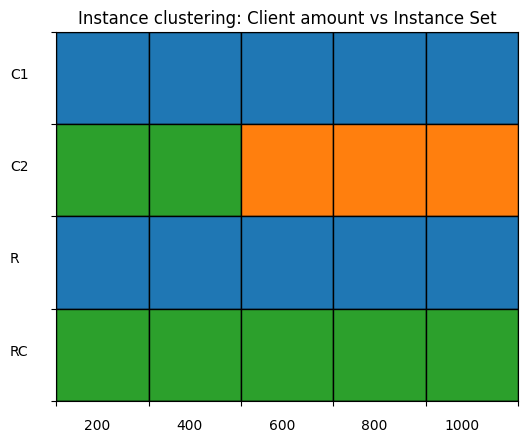

In [121]:

import matplotlib.pyplot as plt
import numpy as np

x_grid_size = 5
y_grid_size = 4
grid = np.zeros((x_grid_size, y_grid_size))
grid_colors = ["tab:blue","tab:orange","tab:green","tab:pink","tab:cyan","tab:olive"]

fig, ax = plt.subplots()

for i in range(len(labels)):
    y = i // x_grid_size
    x = i % x_grid_size
    label = labels[i]
    square = plt.Rectangle((x, (y_grid_size-1)-y), 1, 1, facecolor=grid_colors[label], edgecolor='black')
    ax.add_patch(square)

ax.set_aspect('equal', 'box')
plt.title("Instance clustering: Client amount vs Instance Set")
plt.xticks(np.arange(0, x_grid_size+1, 1),labels="")
plt.yticks(np.arange(0, y_grid_size+1, 1),labels="")

plt.text(-0.5,3.5,"C1")
plt.text(-0.5,2.5,"C2")
plt.text(-0.5,1.5,"R")
#plt.text(-0.7,2.5,"R2")
plt.text(-0.5,0.5,"RC")
#plt.text(-0.7,0.5,"RC2")

plt.text(0.3,-0.3,"200")
plt.text(1.3,-0.3,"400")
plt.text(2.3,-0.3,"600")
plt.text(3.3,-0.3,"800")
plt.text(4.2,-0.3,"1000")
plt.show()


## Clustering de clientes dentro de una instancia
Esto es para computar las features de clustering en cada instancia
PENDIENTE: Obtener un buen valor heuristico para hacer el clustering

In [105]:
import pyvrp as p
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import os
from sklearn.neighbors import NearestNeighbors

instances = os.listdir("Homberger")
instances = [i for i in instances if ".txt" in i]
dictionary = {}
for inst in instances:
    prefix = "".join(inst.split("_")[:2])
    if prefix not in dictionary:
        dictionary[prefix] = inst

In [106]:
def plotClusteredInstance(instance_name,clustering_labels,min_samples,labeled = False):

    instance = p.read("Homberger/" + instance_name, round_func="round", instance_format="solomon")
    model = p.Model.from_data(instance)
    clients = model._clients

    x_coords = np.array([clients[i].x for i in range(len(clients)) if clustering_labels[i] != -1])
    y_coords = np.array([clients[i].y for i in range(len(clients)) if clustering_labels[i] != -1])

    x_outliers = np.array([clients[i].x for i in range(len(clients)) if clustering_labels[i] == -1])
    y_outliers = np.array([clients[i].y for i in range(len(clients)) if clustering_labels[i] == -1])

    labels = [label for label in clustering_labels if label != -1]

    # This is the depot
    fig, ax = plt.subplots()
    ax.scatter(model._depots[0].x,model._depots[0].y, label="Depot", marker="*", color='blue', s=100)
    clients_scatter = ax.scatter(x_coords, y_coords, s=40, label="Clients", c=labels, cmap="tab20")
    outliers_scatter = ax.scatter(x_outliers, y_outliers, s=20, label="Outliers", c="black")

    if labeled:
        for i, label in enumerate(clustering_labels):
            if label != -1:
                ax.text(x_coords[i+1], y_coords[i+1], f'{label}', fontsize=6, ha='center', va='center', color="white", weight="bold")
            else:
                ax.text(x_coords[i+1], y_coords[i+1],'X', fontsize=6, ha='center', va='center', color="white", weight="bold")

    ax.grid(color="grey", linestyle="solid", linewidth=0.)
    ax.set_title("Coordinates")
    ax.set_aspect("equal", "datalim")
    ax.legend(frameon=False, ncol=2)
    plt.text(0.98, 1.05, "min_samples: " + str(min_samples), ha='right', va='top', transform=plt.gca().transAxes)
    plt.savefig("imgs/" + instance_name + "_" + str(min_samples) + '.png')
    plt.show()

In [58]:
#Calculamos la calidad del clustering comparando la distancia intra cluster con inter cluster.
#Distancia intra cluster se calcula como la distancia promedio de todos los puntos de un cluster al centroide del cluster
#Distancia inter cluster se calcula como la distancia entre el centroide del cluster con la distancia al resto de clusters

def clusteringQuality(clients, labels):
    #Almacenamos los clientes en listas separadas para cada cluster
    client_clusters = dict()
    for i in range(len(clients)):
        if labels[i] not in client_clusters.keys():
            client_clusters[labels[i]] = []
        client_clusters[labels[i]].append(clients[i])

    #Obtenemos centroides
    centroids = dict()
    for label, cluster in client_clusters.items():
        centroid = np.array([0,0])
        for client in cluster:
            centroid += np.array([client.x,client.y])
        centroid = np.divide(centroid,len(cluster))
        centroids[label] = centroid

    #Obtenemos average intra cluster distance
    intra_cluster_distances = dict()
    for label,cluster in client_clusters.items():
        distance_to_centroid = 0
        for client in cluster:
            distance_to_centroid += np.sqrt((client.x - centroids[label][0])**2 + (client.y - centroids[label][1])**2)
        distance_to_centroid /= len(cluster)
        
        intra_cluster_distances[label] = distance_to_centroid
    average_intra_cluster_distance = np.mean(list(intra_cluster_distances.values()))

    #Obtenemos distancia de cada cluster al cluster vecino más cercano
    centroid_locations = list(centroids.values())
    if len(centroid_locations) > 1:
        neighbors = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(centroid_locations)
        distances, indices = neighbors.kneighbors(centroid_locations)
        average_inter_cluster_distance = np.mean(distances)
    else:
        average_inter_cluster_distance = 0
    
    #Normalizamos los valores para que escala de instancia no afecte
    max_x = 0
    max_y = 0
    for client in clients:
        if (client.x > max_x):
            max_x = client.x
        if (client.y > max_y):
            max_y = client.y

    max_possible_distance = np.sqrt(max_x**2 + max_y**2)
    average_intra_cluster_distance /= max_possible_distance
    average_inter_cluster_distance /= max_possible_distance

    #Queremos minimizar la distancia intra cluster mientras maximizamos al distancia inter cluster
    #Penalizamos tener demasiados outliers
    outlier_ratio = (sum([i for i in labels if i == -1])*-1) / len(labels)
    quality = -2*average_intra_cluster_distance + 1*average_inter_cluster_distance + -1*outlier_ratio
    return quality
        

### Testing parameter estimation with a single instance

C1_4_4.txt
min_samples:  6


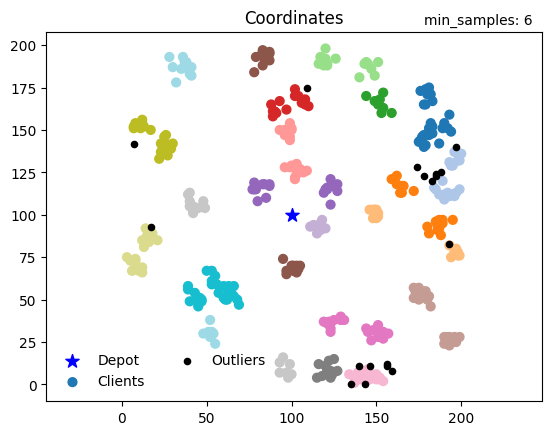

C1_10_6.txt
min_samples:  7


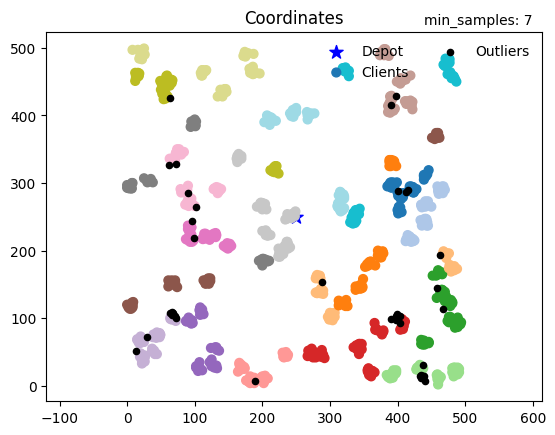

R1_4_8.txt
min_samples:  2


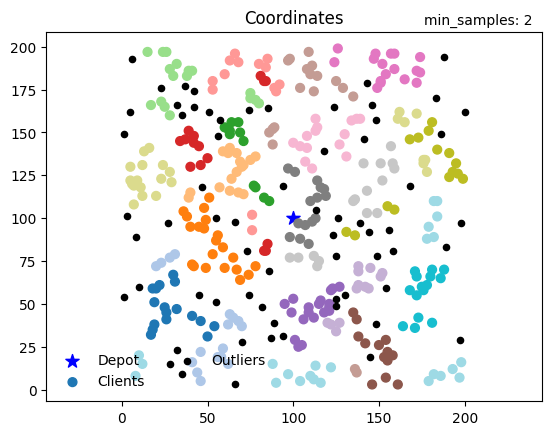

C2_10_7.txt
min_samples:  27


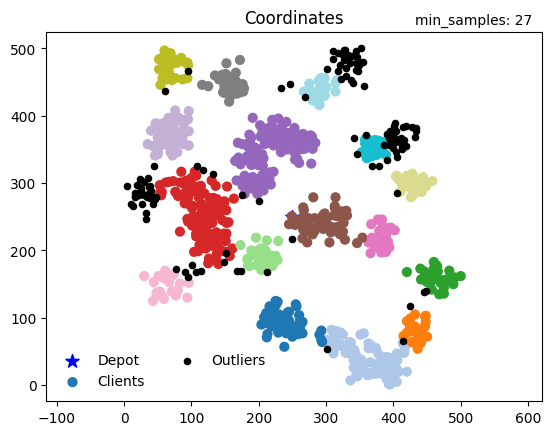

R1_6_10.txt
min_samples:  2


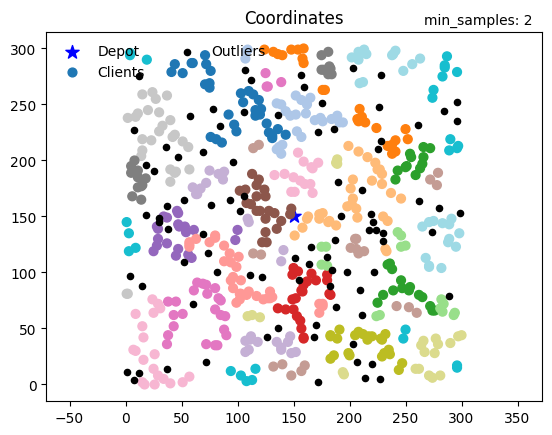

RC2_4_2.txt
min_samples:  2


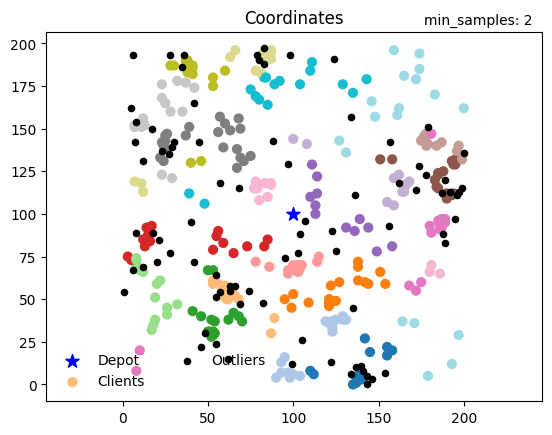

RC1_4_2.txt
min_samples:  2


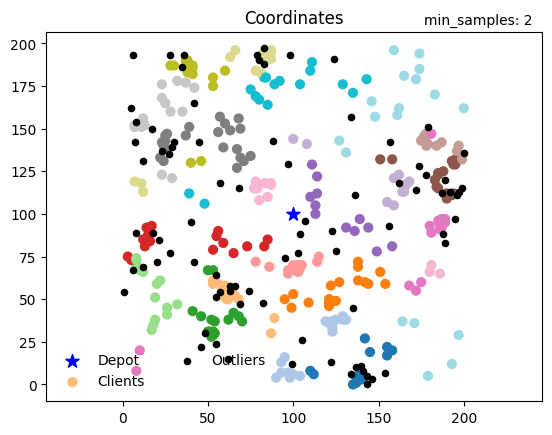

C2_2_9.txt
min_samples:  2


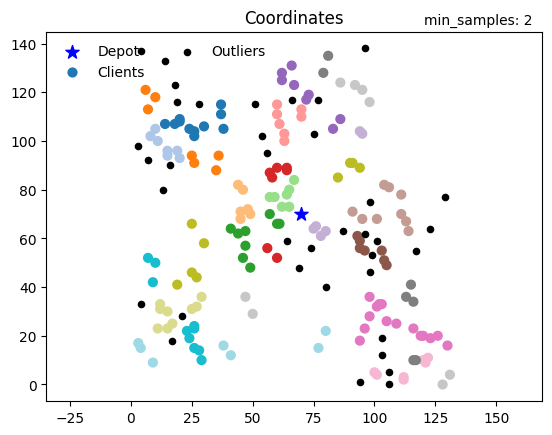

RC1_2_7.txt
min_samples:  14


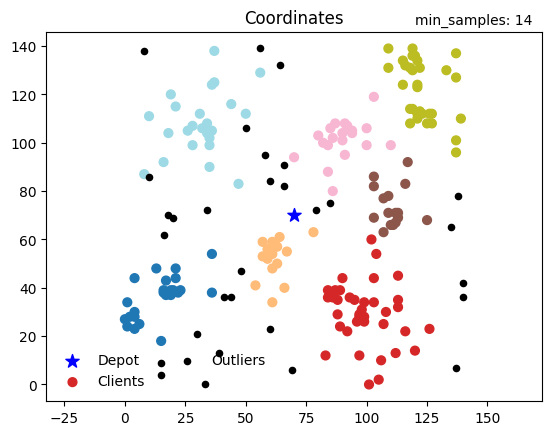

C1_2_3.txt
min_samples:  6


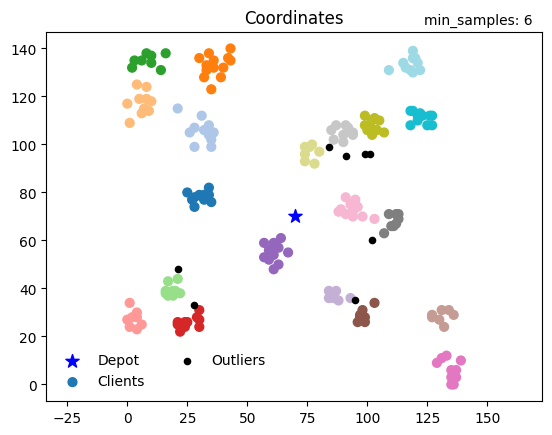

C1_6_5.txt
min_samples:  6


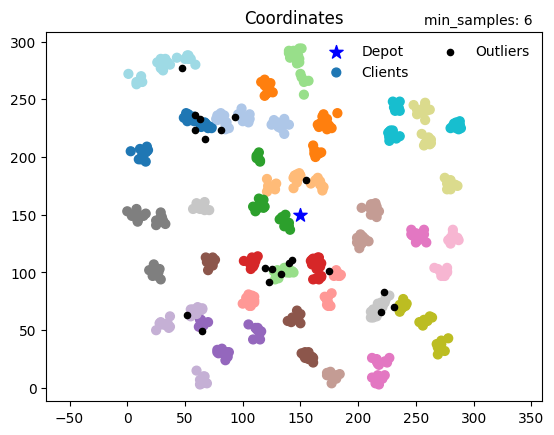

R1_10_2.txt
min_samples:  2


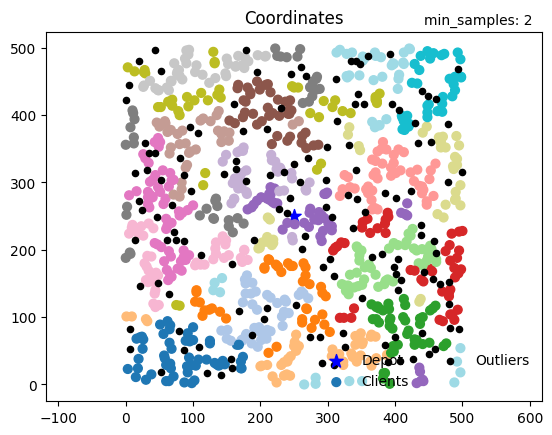

RC2_6_4.txt
min_samples:  2


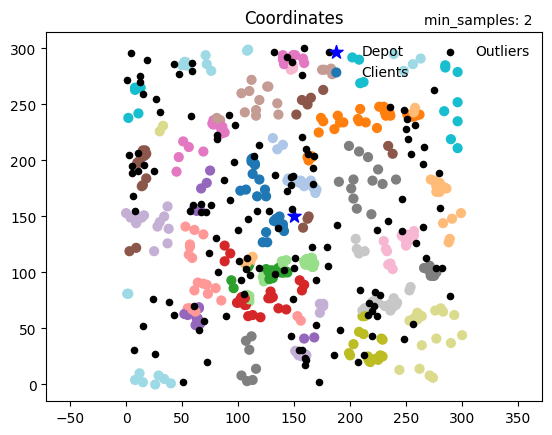

C1_8_4.txt
min_samples:  5


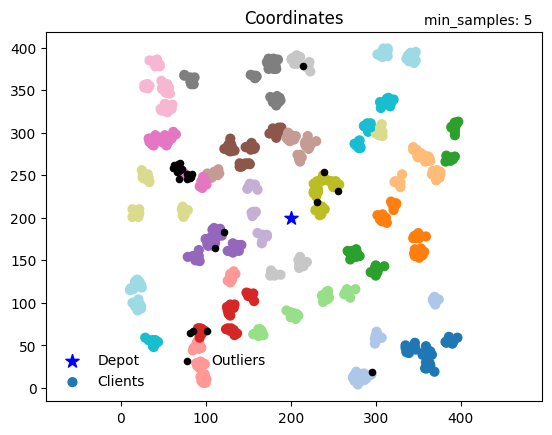

R1_8_6.txt
min_samples:  2


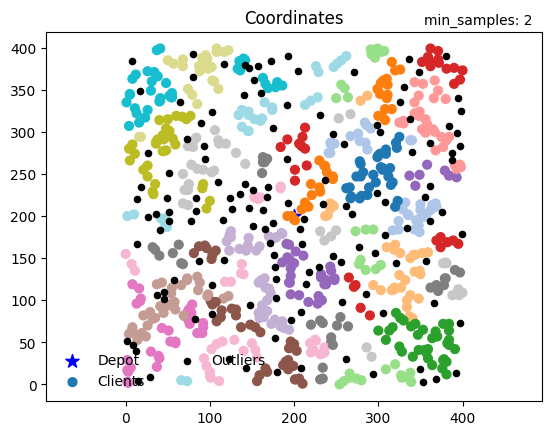

C2_6_1.txt
min_samples:  22


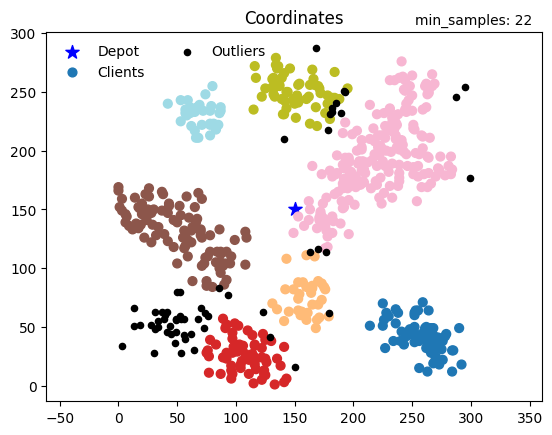

R2_2_6.txt
min_samples:  2


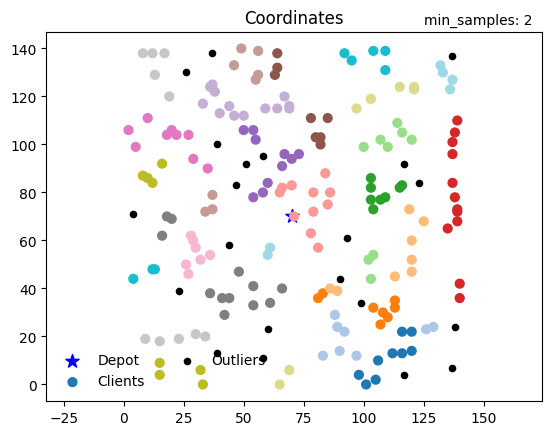

RC1_6_6.txt
min_samples:  2


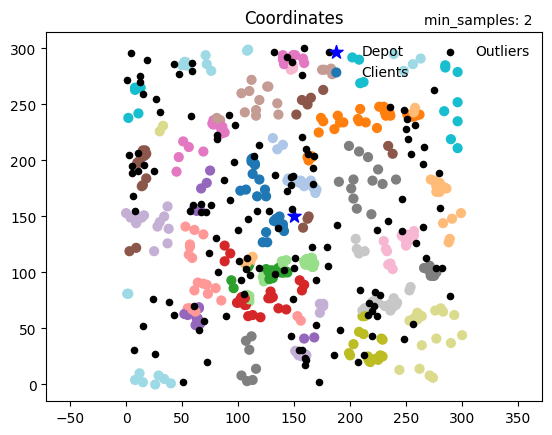

R2_6_4.txt
min_samples:  2


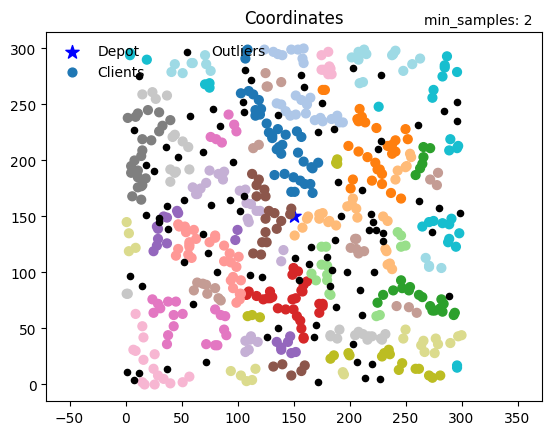

RC1_10_4.txt
min_samples:  2


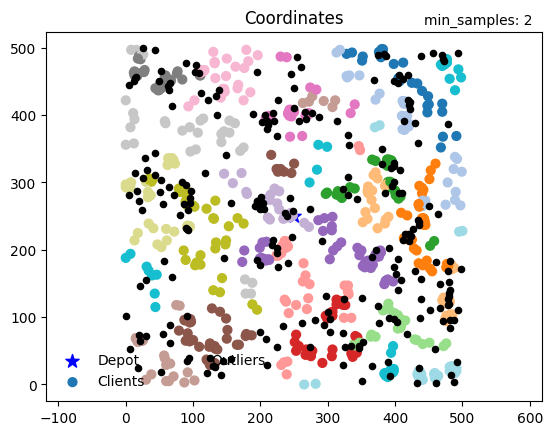

R2_4_5.txt
min_samples:  2


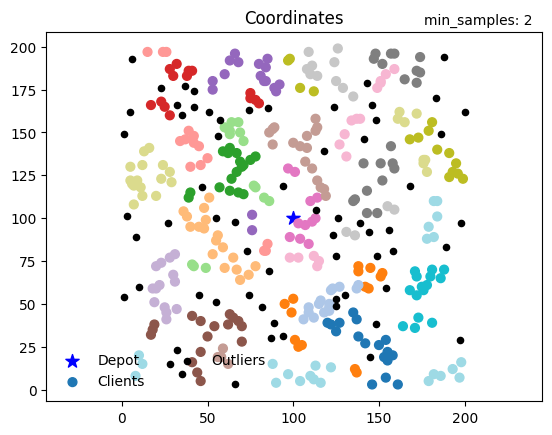

R2_10_10.txt
min_samples:  2


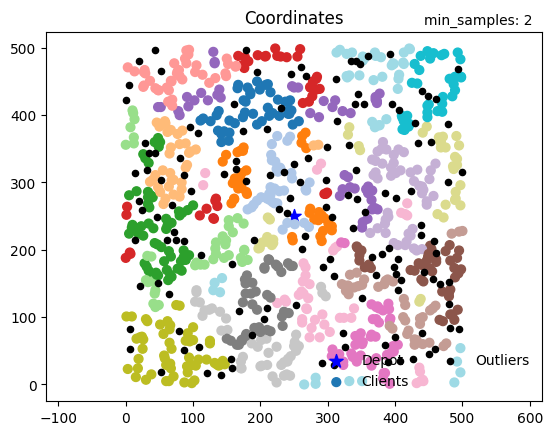

RC2_8_10.txt
min_samples:  2


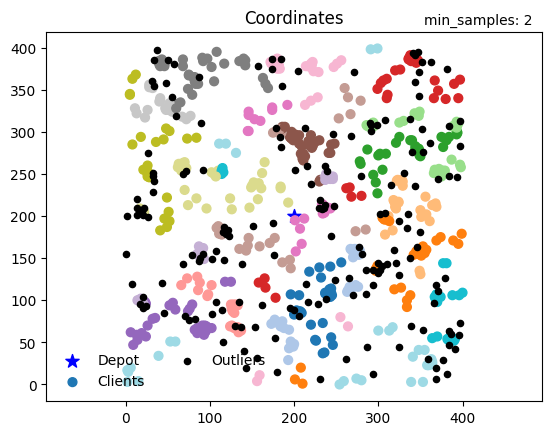

RC2_2_2.txt
min_samples:  14


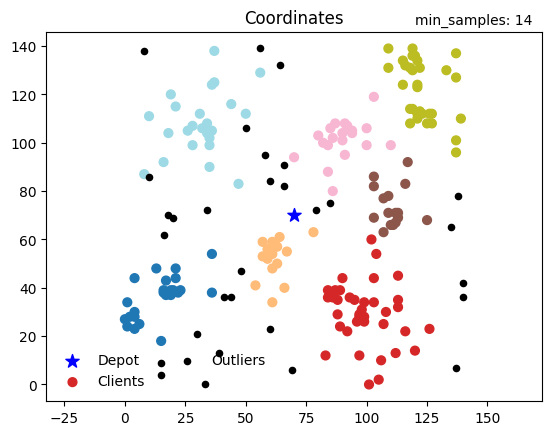

C2_8_2.txt
min_samples:  18


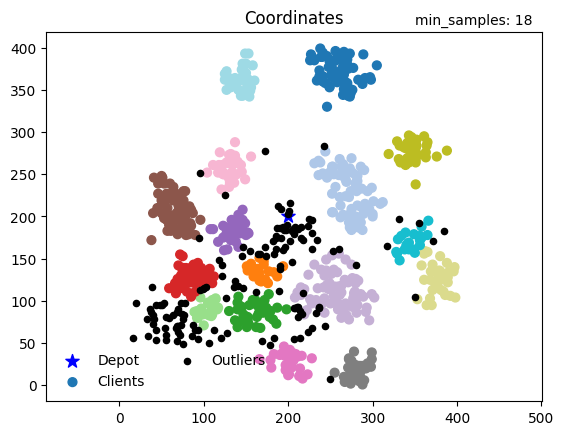

R2_8_10.txt
min_samples:  2


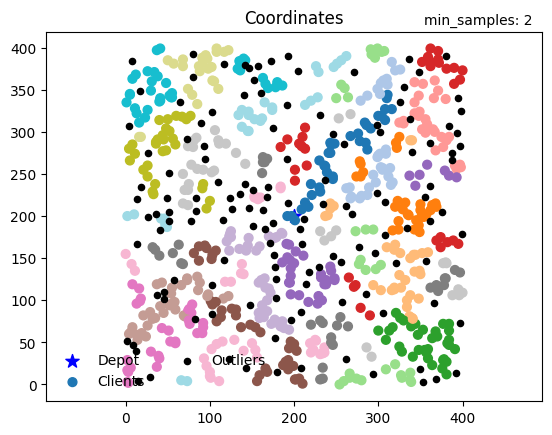

RC2_10_1.txt
min_samples:  2


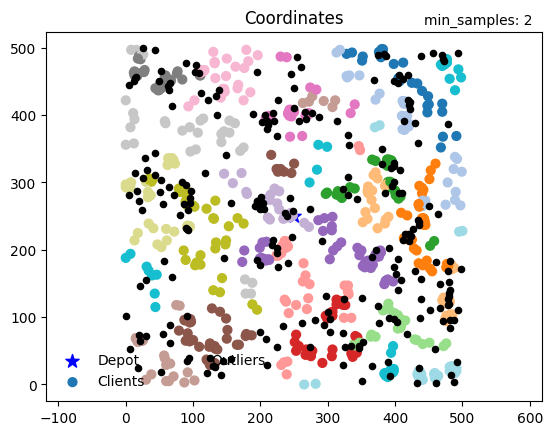

R1_2_1.txt
min_samples:  2


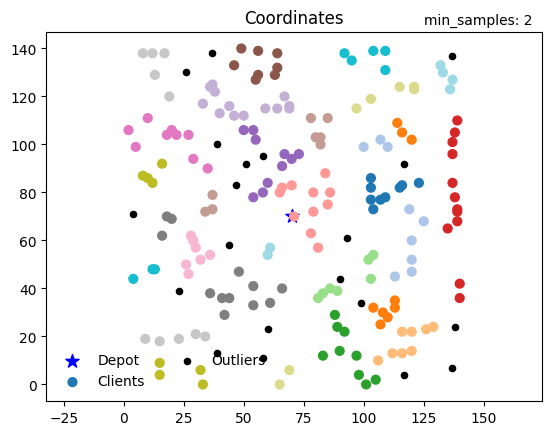

C2_4_6.txt
min_samples:  2


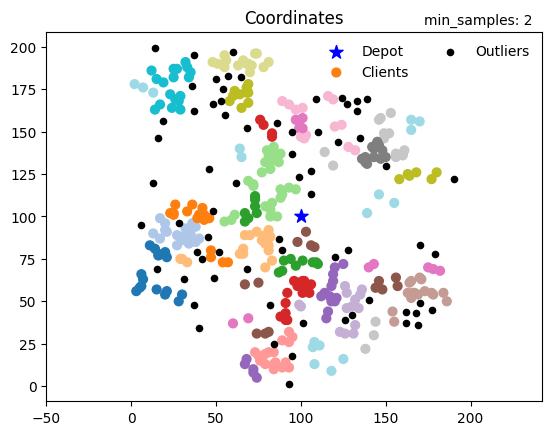

RC1_8_10.txt
min_samples:  2


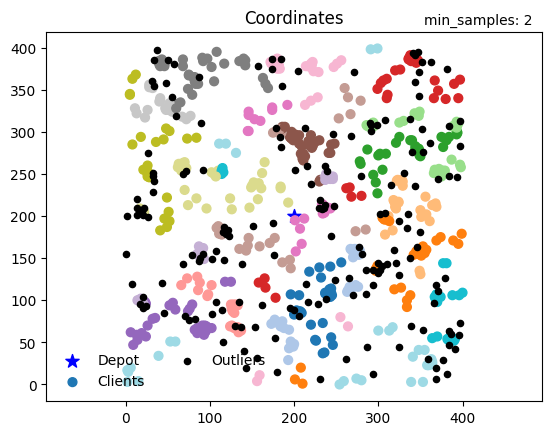

In [60]:
best_clustering = dict()

for _,inst in dictionary.items():
    print(inst)
    #Obtenemos data de instancia
    instance = p.read("Homberger/" + inst, round_func="round", instance_format="solomon")
    model = p.Model.from_data(instance)
    clients = model._clients
    X = np.array([[client.x,client.y] for client in clients])

    best_quality = -10000
    for min_samples in range(2,50):
        clustering = OPTICS(min_samples=min_samples).fit(X)
        quality = clusteringQuality(clients,clustering.labels_)
        if (quality > best_quality):
            best_quality = quality
            best_clustering[inst] = [min_samples,clustering]
    print("min_samples: ",best_clustering[inst][0])
    plotClusteredInstance(inst,best_clustering[inst][1].labels_,best_clustering[inst][0])
